# Data Cleaning with Pandas

In [1]:
import pandas as pd

## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

Now, we'll need to download the two data files that we need. We can do this at the command line:

```bash
wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
wget https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
```

*Note:* If you do not have the `wget` command yet, you can install it: `brew install wget`.

Note that `%20` in a URL translates into a space. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the tile that you want to unzip.


You can use tab completion (press the `tab` key after the first three letters) to fill in the names, including spaces.

In [2]:
sales_df = pd.read_csv('data/EXTR_RPSale.csv')

/Users/cnuno/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [3]:
sales_df.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,1235111,2704079,2584094,1056831
Major,138860,664885,423943,403700,951120
Minor,110,40,50,715,900
DocumentDate,08/21/2014,07/09/1991,10/11/2014,01/04/2013,04/20/1989
SalePrice,245000,0,0,0,85000
RecordingNbr,20140828001436,199203161090,20141205000558,20130110000910,198904260448
Volume,,071,,,117
Page,,001,,,053
PlatNbr,,664885,,,951120
PlatType,,C,,,P


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [4]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023223 entries, 0 to 2023222
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.7+ MB


In [6]:
bldg_df = pd.read_csv('data/Residential Building.zip')

/Users/cnuno/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Another warning! Which column has index 11?

In [7]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [8]:
bldg_df.head().T

,0,1,2,3,4
Major,12303,12303,12303,12303,12303
Minor,9551,9576,9585,9598,9601
BldgNbr,1,1,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,10638 31ST AVE SW 98146,10621 32ND AVE SW 98146,10817 31ST AVE SW 98146,10215 24TH AVE SW 98146,3411 SW 106TH ST 98146
BuildingNumber,10638,10621,10817,10215,3411
Fraction,,,,,
DirectionPrefix,,,,,SW
StreetName,31ST,32ND,31ST,24TH,106TH
StreetType,AVE,AVE,AVE,AVE,ST


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [9]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']]

In [10]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511831 entries, 0 to 511830
Data columns (total 4 columns):
Major            511831 non-null int64
Minor            511831 non-null int64
SqFtTotLiving    511831 non-null int64
ZipCode          468421 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB


In [11]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

In [12]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'])

ValueError: Unable to parse string "      " at position 944529

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [ ]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [13]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023223 entries, 0 to 2023222
Data columns (total 4 columns):
Major           float64
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [15]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023223 entries, 0 to 2023222
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 61.7+ MB


Now, let's try our join again.

In [17]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [18]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444152 entries, 0 to 1444151
Data columns (total 6 columns):
Major            1444152 non-null float64
Minor            1444152 non-null float64
DocumentDate     1444152 non-null object
SalePrice        1444152 non-null int64
SqFtTotLiving    1444152 non-null int64
ZipCode          1327518 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 77.1+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [20]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
93,717370.0,350.0,12/01/1997,0,3380,NaN
94,717370.0,350.0,09/13/2004,300000,3380,NaN
95,717370.0,350.0,02/06/2006,901000,3380,NaN
112,277110.0,1923.0,02/08/2007,372500,1000,NaN
113,277110.0,1923.0,02/08/2007,0,1000,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

In [21]:
sales_data = sales_data.loc[sales_data['ZipCode'].notna(), :]

sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


# Your turn: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

* This is not possible in the world that we live in;
    + doesn't make sense
    + negative sales price
    + do a gut check, document why you are dropping these records
* Things that are surprising
    + $1 sale price is weird but not totally out of the realm of possibility
    + Can't remove freely: need to investigate the data collection process
    + Use your judgement and document your thoughts!

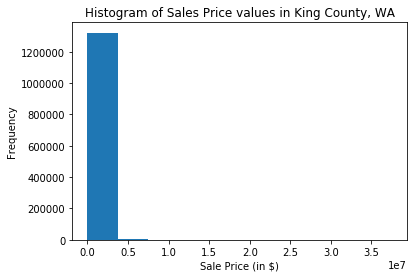

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(sales_data["SalePrice"])
plt.xlabel("Sale Price (in $)")
plt.ylabel("Frequency")
plt.title("Histogram of Sales Price values in King County, WA")
plt.show()

Looks like we have a few cases of negative `SalePrice` values. Let's remove these from the data frame.

In [23]:
(sales_data["SalePrice"] < 0).sum()

3

If our goal is to capture the relationship between `SalePrice` and other features in a home, we should not include records where `SalePrice` is equal to 0. These will be dropped so that we only capture records where a transaction occured where more than $0 was exchanged for the property.

In [24]:
sales_data = sales_data.loc[sales_data["SalePrice"] > 0, :]
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871028 entries, 0 to 1444151
Data columns (total 6 columns):
Major            871028 non-null float64
Minor            871028 non-null float64
DocumentDate     871028 non-null object
SalePrice        871028 non-null int64
SqFtTotLiving    871028 non-null int64
ZipCode          871028 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.5+ MB


Let's take a look to see if `SqFtTotLiving` has any negative values as well.

In [25]:
(sales_data["SqFtTotLiving"] < 0).sum()

0

### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [ ]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head()

### 3. Add a column for PricePerSqFt



### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!